In [19]:
from pathlib import Path

PROJECT_ROOT = Path("/Users/sajanshergill/Machine-Learning-Projects/Trust-Graph")
print([p.name for p in (PROJECT_ROOT / "src").glob("*.py")])

['signals.py', 'config.py', 'scoring.py', 'data_loader.py', '__init__.py', 'graph_builder.py', 'viz.py']


In [16]:
from src.data_loader import load_yelp_minimal
from src.config import Config
from pathlib import Path

cfg = Config(
    data_dir=Path("/Users/sajanshergill/Machine-Learning-Projects/Trust-Graph/data/yelp"),
    max_reviews=50_000,
    seed=42,
    burst_window_days=14
)

reviews, users, businesses = load_yelp_minimal(
    data_dir=cfg.data_dir,
    review_file="yelp_academic_dataset_review.json",
    user_file="yelp_academic_dataset_user.json",
    business_file="yelp_academic_dataset_business.json",
    max_reviews=cfg.max_reviews,
    seed=cfg.seed,
    keep_text=False
)

print("reviews:", reviews.shape)


Reading yelp_academic_dataset_review.json: 6990280it [00:19, 351343.24it/s]
Reading yelp_academic_dataset_user.json: 1987897it [00:27, 71538.71it/s] 
Reading yelp_academic_dataset_business.json: 150346it [00:02, 71739.34it/s] 


reviews: (50000, 5)


In [20]:
import importlib
import src.signals
importlib.reload(src.signals)

from src.signals import (
    business_burst_score,
    business_rating_skew,
    business_reviewer_overlap
)

burst_df = business_burst_score(reviews, window_days=14)
skew_df = business_rating_skew(reviews)
overlap_df = business_reviewer_overlap(reviews, heavy_reviewer_threshold=10)

print("burst_df:", burst_df.shape)
print("skew_df:", skew_df.shape)
print("overlap_df:", overlap_df.shape)


burst_df: (29645, 7)
skew_df: (29645, 5)
overlap_df: (29645, 2)


In [21]:
import importlib
import src.scoring
importlib.reload(src.scoring)

from src.scoring import build_business_risk_table

risk = build_business_risk_table(burst_df, skew_df, overlap_df)
risk.head(20)


,business_id,burst_score,rating_skew,overlap_score,z_burst,z_skew,z_overlap,risk_score,risk_percentile
0,LNvsrgojDTFz1IJXjS0-ng,137.714286,-0.463180,0.0,51.962050,-1.005212,-0.068455,23.017407,1.000000
1,C3RFTpNj8_4Yz9gtmGeH5Q,124.285714,0.036820,0.0,46.890668,0.089399,-0.068455,21.118399,0.999966
2,KwADSZGoeiqnlR4vUpNhig,96.047619,-0.463180,0.0,36.226379,-1.005212,-0.068455,15.936355,0.999933
3,GVtJD93hEh7pQD29bmyTQA,89.464286,0.036820,0.0,33.740143,0.089399,-0.068455,15.200663,0.999899
4,9u90_FSluaf9qwbw5WF6TA,88.821429,0.036820,0.0,33.497364,0.089399,-0.068455,15.091412,0.999865
5,Gz-yCWu_90HODnAlV_RDBg,83.380952,0.203487,0.0,31.442735,0.454269,-0.068455,14.294534,0.999831
6,dYicZfoQApq5y0vO6FbLtw,81.589286,0.286820,0.0,30.766101,0.636704,-0.068455,14.053901,0.999798
7,NweYGXELGcYZ0I_eRWJiCQ,75.892857,0.536820,0.0,28.614810,1.184010,-0.068455,13.277377,0.999764
8,f-xTgL53Bd_zPsDTn1_37g,79.666667,-0.463180,0.0,30.040012,-1.005212,-0.068455,13.152490,0.999730
9,LUk83EHRuKoUtBT1g5nbVQ,69.821429,-0.463180,0.0,26.321898,-1.005212,-0.068455,11.479339,0.999696


In [23]:
from pathlib import Path

out_dir = Path("/Users/sajanshergill/Machine-Learning-Projects/Trust-Graph/outputs/tables")
out_dir.mkdir(parents=True, exist_ok=True)

# Join business names (if available)
if len(businesses) > 0:
    risk_named = risk.merge(
        businesses[["business_id", "name", "city", "state"]],
        on="business_id",
        how="left"
    )
else:
    risk_named = risk

# Save
risk_named.head(20).to_csv(
    out_dir / "top_risky_businesses.csv",
    index=False
)

print("Wrote:", out_dir / "top_risky_businesses.csv")


Wrote: /Users/sajanshergill/Machine-Learning-Projects/Trust-Graph/outputs/tables/top_risky_businesses.csv


In [25]:
from src.graph_builder import build_bipartite_review_graph

# rebuild graph in this notebook's scope
G = build_bipartite_review_graph(reviews)

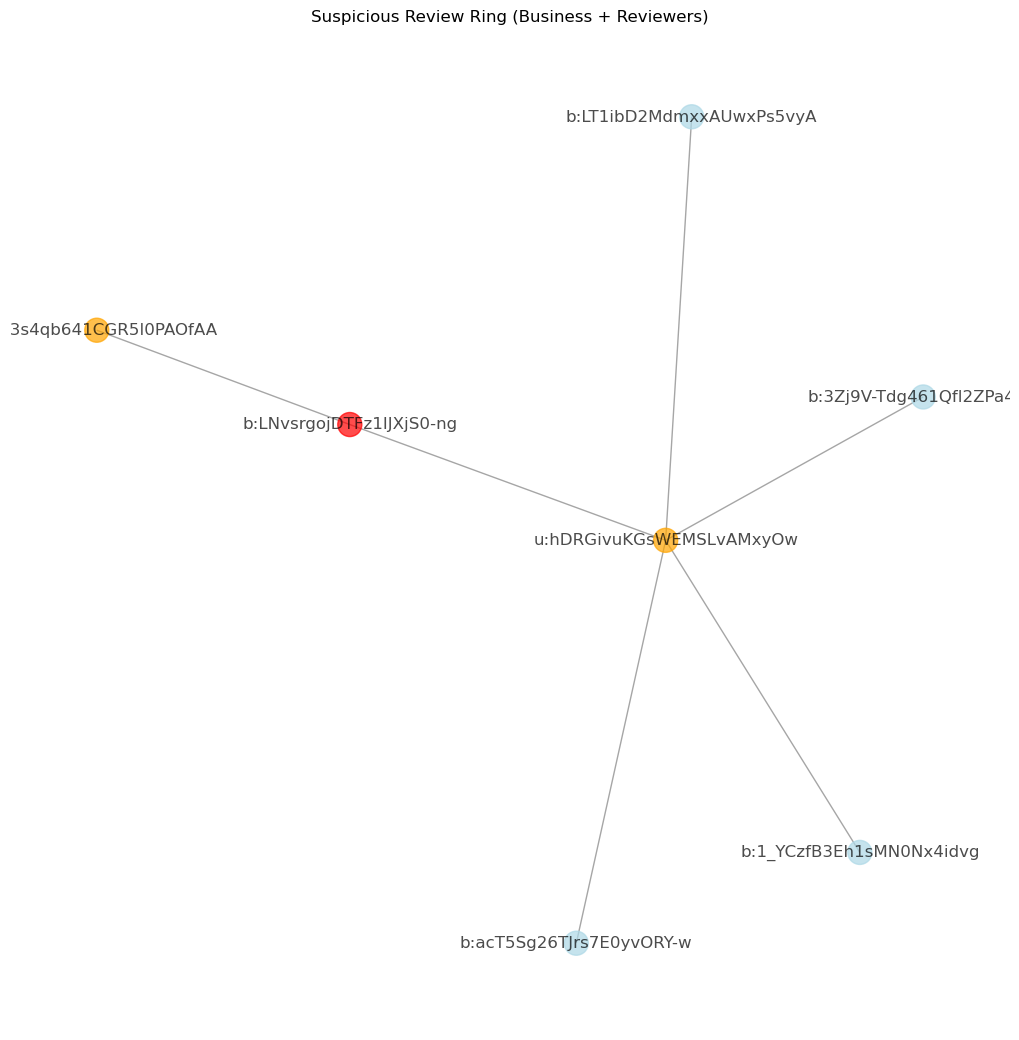

In [26]:
from src.viz import plot_business_review_ring

# Pick top risky business
top_business_id = risk.iloc[0]["business_id"]
business_node = f"b:{top_business_id}"

plot_business_review_ring(G, business_node)


In [28]:
import importlib
import src.viz

importlib.reload(src.viz)

from src.viz import plot_business_review_ring


/Users/sajanshergill/Machine-Learning-Projects/Trust-Graph/src/viz.py:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


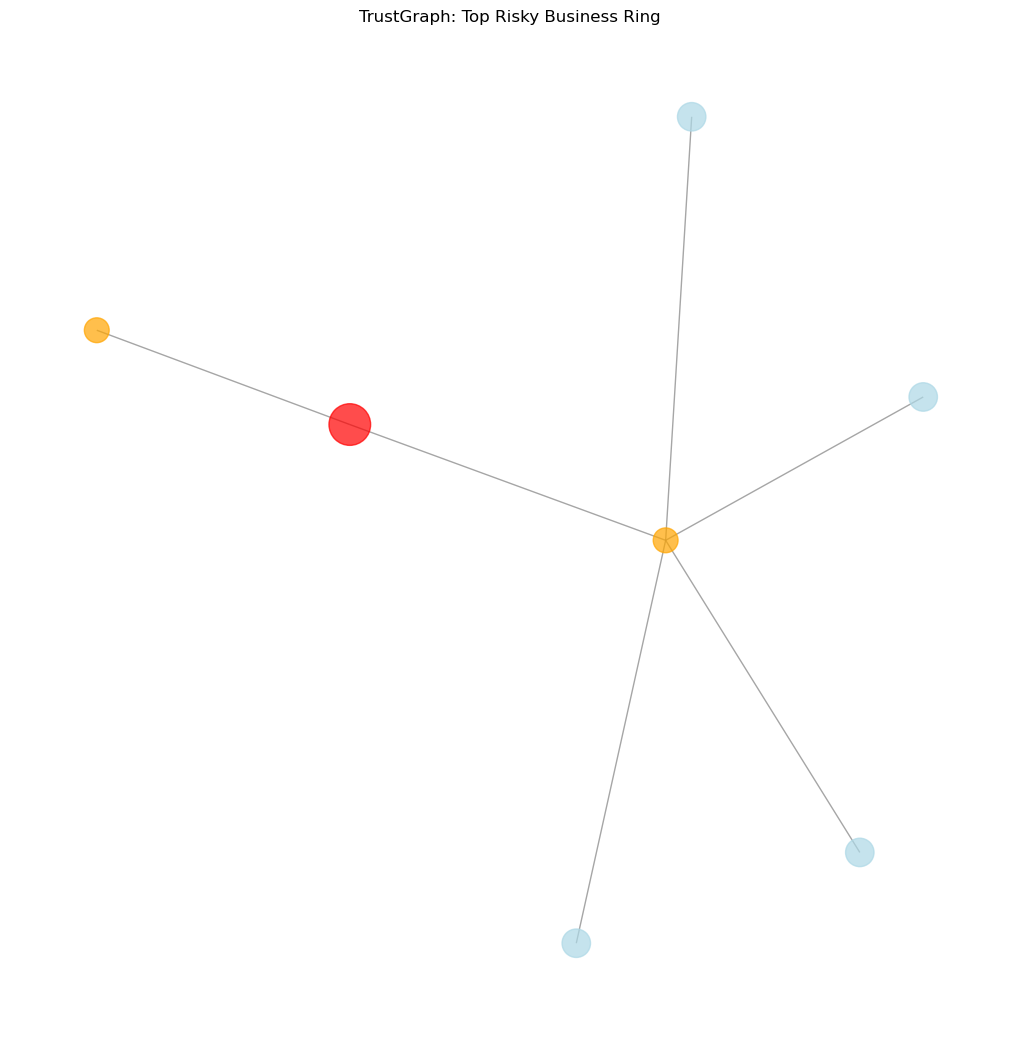

Saved figure: ../outputs/figures/ring_top_business.png


In [29]:
from pathlib import Path
from src.viz import plot_business_review_ring

top_business_id = risk.iloc[0]["business_id"]
business_node = f"b:{top_business_id}"

fig_path = Path("../outputs/figures/ring_top_business.png")
fig_path.parent.mkdir(parents=True, exist_ok=True)

plot_business_review_ring(
    G,
    business_node,
    save_path=str(fig_path),
    title="TrustGraph: Top Risky Business Ring"
)

print("Saved figure:", fig_path)


In [30]:
import inspect
from src.viz import plot_business_review_ring

print(inspect.signature(plot_business_review_ring))


(G, business_node, max_reviewers=20, figsize=(10, 10), save_path=None, title=None)
